# Finite Impulse Response (FIR) Delay Effect
### Author: Pawel Budzynski

In [1]:
from typing import Optional

import IPython
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft
import scipy.signal
import scipy.io.wavfile

In [2]:
sample_rate, sound = scipy.io.wavfile.read("string_1.wav")
IPython.display.Audio("string_1.wav")

FIR Delay effect will be implemented using the following formula:
$$s[t] = e[t] + \alpha e[t-D],$$
where $e$ is the entry signal, $s$ is the output,
$\alpha ≥ 0$ is the attenuation factor, and $D$ the time delay.

In [19]:
def fir_delay(
    signal: np.ndarray,
    alpha: float,
    delay: float,
    sample_rate: int,
    output_size: Optional[int] = None,
) -> np.ndarray:
    """Apply FIR Delay effect for a given signal. 
        signal: the input signal.
        alpha: attenuation factor.
        delay: time delay in seconds.
        sample_rate: the sample rate of the input signal.
        output_size: the size of the output signal, same as input signal by default.
    """
    # Define container for the output signal and its size.
    if output_size is None: 
        output_size = len(signal)    
    output = np.zeros((output_size,))
    # Transform delay value from time to the amount of samples.
    D = int(delay*sample_rate)
    # Iteratively apply the filter.
    for t in range(len(signal)):
        if t-D => 0:
            output[t] = signal[t] + alpha * signal[t-D]
        else:
            output[t] = signal[t]
    
    return output

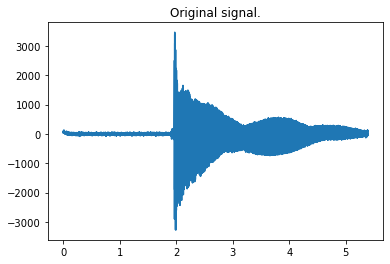

In [25]:
t_max = len(sound) / sample_rate
t = np.linspace(0, t_max, len(sound))
plt.plot(t, sound)
plt.title("Original signal.")
plt.show()

In [44]:
sound_delay = fir_delay(
    sound, 
    alpha=0.5,
    delay=1,
    sample_rate=sample_rate,
    output_size=1*len(sound)
)

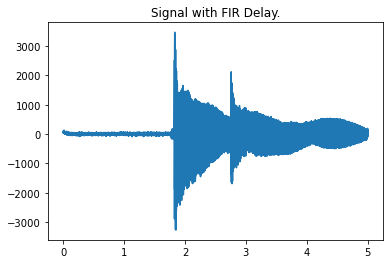

In [45]:
t = np.linspace(0, int(len(sound_delay)/sample_rate), len(sound_delay))
plt.plot(t, sound_delay.astype(np.int16))
plt.title("Signal with FIR Delay.")
plt.show()

Depending on the filter parameters the output signal may look very different. For attenuation factors $\alpha \gt 1$ the repeated sound will be louder while for $0 \le \alpha \le 1$ the ampliture of the repeated sound will be smaller or equal. The implementation allows to define output size however for FIR signal the values that are exceding the lenght of the original signal will be always $0$.

In [46]:
sound_delay_2 = fir_delay(
    sound, 
    alpha=2,
    delay=2,
    sample_rate=sample_rate,
    output_size=2*len(sound)
)

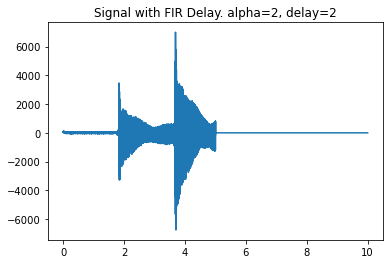

In [47]:
t = np.linspace(0, int(len(sound_delay_2)/sample_rate), len(sound_delay_2))
plt.plot(t, sound_delay_2.astype(np.int16))
plt.title("Signal with FIR Delay. alpha=2, delay=2")
plt.show()

The freshly computed signal with an effect may be saved as a proper sound file and played.

In [48]:
scipy.io.wavfile.write("string_delay.wav", sample_rate, sound_delay.astype(np.int16))
IPython.display.Audio("string_delay.wav")

A brief look at the spectrum shows that the signals do not differ much in the Fourier domain. The peak frequencies stay in the same positions however their energy increased which may sense because the application of the filted increases the overall energy of the signal since $\alpha \ge 0$.

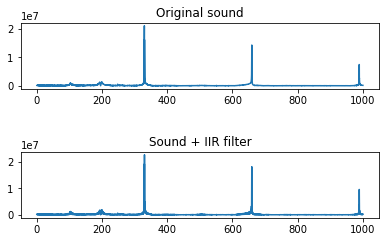

In [49]:
# Fourier transform of the signals.
sound_fft = scipy.fft.rfft(sound)
sound_delay_fft = scipy.fft.rfft(sound_delay)
# Compute corresponding frequencies.
xf = scipy.fft.rfftfreq(len(sound), 1/sample_rate)
xf_delay = scipy.fft.rfftfreq(len(sound_delay), 1/sample_rate)

# For the plot take only frequencies less equal 1000Hz.
mask = xf <= 1000
mask_delay = xf_delay <= 1000
xf = xf[mask]
xf_delay = xf_delay[mask_delay]
sound_fft = sound_fft[mask]
sound_delay_fft = sound_delay_fft[mask_delay]

# Plot spectrums of the signals.
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(xf, np.abs(sound_fft))
ax1.set_title("Original sound")
ax2.plot(xf_delay, np.abs(sound_delay_fft))
ax2.set_title("Sound + IIR filter")
fig.tight_layout(pad=3.0)
plt.show()